# About Dataset

In [1]:
#importing important libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Load data set
df=pd.read_csv('ccpp.csv')
df.head(5)

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


In [3]:
#to check the information of the data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47840 entries, 0 to 47839
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      47840 non-null  float64
 1   V       47840 non-null  float64
 2   AP      47840 non-null  float64
 3   RH      47840 non-null  float64
 4   PE      47840 non-null  float64
dtypes: float64(5)
memory usage: 1.8 MB


In [4]:
#to check the number of duplicate items in the dataset
df.duplicated().sum()

38313

In [5]:
#check the null value 
df.isnull().sum()

AT    0
V     0
AP    0
RH    0
PE    0
dtype: int64

In [6]:
#data type of the given dataset
df.dtypes

AT    float64
V     float64
AP    float64
RH    float64
PE    float64
dtype: object

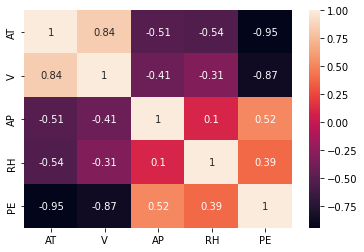

In [7]:
#check co relation between input and output
sns.heatmap(df.corr(),annot=True)
plt.show()

In [8]:
#to delete duplicate items from the dataset 
df.drop_duplicates(inplace=True)

In [9]:
#to check the shape of dataset after deletion of duplicate items
df.shape

(9527, 5)

In [10]:
#to check only first two rows
df.head(2)

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37


In [11]:
#select input and output from data set
#x=df[columns] also can be use as we had created list of all the columns
x=df.drop('PE',axis=1)#input
y=df['PE']#output

In [12]:
#input Data
x.head(2)

,AT,V,AP,RH
0,14.96,41.76,1024.07,73.17
1,25.18,62.96,1020.04,59.08


In [13]:
#output data
y.head(2)

0    463.26
1    444.37
Name: PE, dtype: float64

In [14]:
#now we will import train_test_split Library for the seperation of data of 70% and 30%
from sklearn.model_selection import train_test_split

In [15]:
#train_test_split( ) we seperate dataset x and y in 70% and 30% for training and testing
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

In [16]:
# train model with linear regression
from sklearn.linear_model import LinearRegression

In [17]:
#create the object of LinearRegression class
lr=LinearRegression()

In [18]:
#train the model with 70% data, use fit() method of linearRegression
lr.fit(x_train,y_train)

LinearRegression()

In [19]:
#check slope/gradient/coefficient and intercept then use
m=lr.coef_
print('Slope: ',m)
c=lr.intercept_
print('Intercept: ',c)

#coef_ and intercept_ both are inbuilt method of LinearRegression class

Slope:  [-1.97090015 -0.23501998  0.07099617 -0.15974312]
Intercept:  445.60494672741976


In [20]:
x.columns

Index(['AT', 'V', 'AP', 'RH'], dtype='object')

In [21]:
#check trainging score() inbuilt function od linearRegression class
#score() is similar to r2-score (value means range 0 to 1)
print('Training score: ', lr.score(x_train,y_train)) #training score

Training score:  0.9269675636908782


In [22]:
#testing the model
y_pred=lr.predict(x_test)

In [23]:
from sklearn.metrics import r2_score
#check testing score
print('Testing score : ',lr.score(x_test,y_test))
#or
#from r2 score
print('Testing r2 score',r2_score(y_test,y_pred).round(2))

Testing score :  0.9316950306716325
Testing r2 score 0.93


In [24]:
#Now we will increase the degree of the feature and will give the data to Polynomial Regression
from sklearn.preprocessing import PolynomialFeatures

In [25]:
#create object of polynomial 
poly=PolynomialFeatures(2)

In [26]:
x_poly=poly.fit_transform(x)

In [27]:
x_poly=df.drop('PE',axis=1)#input
y=df['PE']#output

In [28]:
x_train,x_test,y_train,y_test=train_test_split(x_poly,y,test_size=0.3,random_state=1)

In [29]:
#train the model with 75% data, use fit() method of linearRegression
lr.fit(x_train,y_train)

LinearRegression()

In [30]:
#check slope/gradient/coefficient and intercept then use
m=lr.coef_
print('Slope: ',m)
c=lr.intercept_
print('Intercept: ',c)

#coef_ and intercept_ both are inbuilt method of LinearRegression class

Slope:  [-1.97090015 -0.23501998  0.07099617 -0.15974312]
Intercept:  445.60494672741976


In [31]:
print('Training score: ', lr.score(x_train,y_train))

Training score:  0.9269675636908782


In [32]:
#testing the model
y_pred=lr.predict(x_test)

In [33]:
from sklearn.metrics import r2_score
#check testing score
print('Testing score : ',lr.score(x_test,y_test))
print('Training score: ', lr.score(x_train,y_train))
#or
#from r2 score
print('Testing r2 score',r2_score(y_test,y_pred).round(2))

Testing score :  0.9316950306716325
Training score:  0.9269675636908782
Testing r2 score 0.93


In [34]:
#now will apply Lasso l1 and Ridge l2
from sklearn.linear_model import Lasso

In [35]:
#create object of Lasso
l1=Lasso(200)

In [36]:
#train the model with lasso
l1.fit(x_train,y_train)

Lasso(alpha=200)

In [37]:
#to check the slope of lasso on polynomial data
slope_l1=l1.coef_
print('Slope of Lasso: {}'.format(slope_l1))

Slope of Lasso: [-0. -0.  0.  0.]


In [38]:
#check slopes before adding the error
slope_lr=lr.coef_
slope_lr

array([-1.97090015, -0.23501998,  0.07099617, -0.15974312])

In [39]:
dict={'columns':x.columns,'Slope before adding lasso error':slope_lr,'Slope after adding lasso error':slope_l1}
df1=pd.DataFrame(dict)
df1

,columns,Slope before adding lasso error,Slope after adding lasso error
0,AT,-1.970900,-0.0
1,V,-0.235020,-0.0
2,AP,0.070996,0.0
3,RH,-0.159743,0.0


In [40]:
#cheking the training score after Lasso
l1.score(x_train,y_train)

0.0

In [41]:
#checking the testing score
l1.score(x_test,y_test)

-3.0923035193808346e-05

In [42]:
for i in range(200,1001,50):
    #create the object
    l1=Lasso(i)
    l1.fit(x_train,y_train)
    y_pred-l1.predict(x_test)
    score1=l1.score(x_train,y_train).round(2)
    score2=l1.score(x_test,y_test).round(2)
    print('Training Score : {} = {}'.format(i,score1))
    print('Testing Score : {} = {}'.format(i,score2))

Training Score : 200 = 0.0
Testing Score : 200 = -0.0
Training Score : 250 = 0.0
Testing Score : 250 = -0.0
Training Score : 300 = 0.0
Testing Score : 300 = -0.0
Training Score : 350 = 0.0
Testing Score : 350 = -0.0
Training Score : 400 = 0.0
Testing Score : 400 = -0.0
Training Score : 450 = 0.0
Testing Score : 450 = -0.0
Training Score : 500 = 0.0
Testing Score : 500 = -0.0
Training Score : 550 = 0.0
Testing Score : 550 = -0.0
Training Score : 600 = 0.0
Testing Score : 600 = -0.0
Training Score : 650 = 0.0
Testing Score : 650 = -0.0
Training Score : 700 = 0.0
Testing Score : 700 = -0.0
Training Score : 750 = 0.0
Testing Score : 750 = -0.0
Training Score : 800 = 0.0
Testing Score : 800 = -0.0
Training Score : 850 = 0.0
Testing Score : 850 = -0.0
Training Score : 900 = 0.0
Testing Score : 900 = -0.0
Training Score : 950 = 0.0
Testing Score : 950 = -0.0
Training Score : 1000 = 0.0
Testing Score : 1000 = -0.0


In [43]:
#now will apply Ridge l2
from sklearn.linear_model import Ridge

In [44]:
for i in range(1,51,1):
    #create the object
    l2=Ridge(i)
    l2.fit(x_train,y_train)
    y_pred-l2.predict(x_test)
    score1=l2.score(x_train,y_train).round(2)
    score2=l2.score(x_test,y_test).round(2)
    print('Training Score : {} = {}'.format(i,score1))
    print('Testing Score : {} = {}'.format(i,score2))

Training Score : 1 = 0.93
Testing Score : 1 = 0.93
Training Score : 2 = 0.93
Testing Score : 2 = 0.93
Training Score : 3 = 0.93
Testing Score : 3 = 0.93
Training Score : 4 = 0.93
Testing Score : 4 = 0.93
Training Score : 5 = 0.93
Testing Score : 5 = 0.93
Training Score : 6 = 0.93
Testing Score : 6 = 0.93
Training Score : 7 = 0.93
Testing Score : 7 = 0.93
Training Score : 8 = 0.93
Testing Score : 8 = 0.93
Training Score : 9 = 0.93
Testing Score : 9 = 0.93
Training Score : 10 = 0.93
Testing Score : 10 = 0.93
Training Score : 11 = 0.93
Testing Score : 11 = 0.93
Training Score : 12 = 0.93
Testing Score : 12 = 0.93
Training Score : 13 = 0.93
Testing Score : 13 = 0.93
Training Score : 14 = 0.93
Testing Score : 14 = 0.93
Training Score : 15 = 0.93
Testing Score : 15 = 0.93
Training Score : 16 = 0.93
Testing Score : 16 = 0.93
Training Score : 17 = 0.93
Testing Score : 17 = 0.93
Training Score : 18 = 0.93
Testing Score : 18 = 0.93
Training Score : 19 = 0.93
Testing Score : 19 = 0.93
Training Sc

In [45]:
#Here we will make sure about the model for one last time with cross Validation for
#Ridge as Lasso is not compatible for the dataset
from sklearn.model_selection import cross_val_score

In [46]:
l2=Ridge(2)

In [47]:
l2_cross=cross_val_score(l2,x_poly,y,cv=4)
l2_cross

array([0.93129237, 0.92662556, 0.93246251, 0.92288068])

In [48]:
np.mean(l2_cross)

0.9283152792660644

Here, as we can see the accuracy of the model is 92% after applying cross validation on Ridge. We can consider that our model 92% accurate. 